### Project: Fractals


##### Fern :

Fern can be created by implementation of if loops and while loop. We will discuss three different approaches to create fern.

#### Method 1: Direct implementation

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
%matplotlib inline
sns.set()

In [3]:
import random as random
x = 0
y = 0
X = [x]
Y = [y]
n=1
isprint = False
while n < 1000000:
    r = random.uniform(0,100)
    if r <  1.0:
        x = 0
        y = 0.16*Y[n-1]
        X.append(x) ; Y.append(y)
        
    elif r > 1.0 and r < 86.0:
        x = 0.85*X[n-1] + 0.04*Y[n-1]
        y = -0.04*X[n-1] + 0.85*Y[n-1]+1.6
        X.append(x);Y.append(y)
    elif r > 86.0 and r < 93.0:
        x = 0.2*X[n-1] - 0.26*Y[n-1]
        y = 0.23*X[n-1] + 0.22*Y[n-1] + 1.6
        
        X.append(x);Y.append(y)
    
    elif r > 93.0 and r < 100.0:
        x = -0.15*X[n-1] + 0.28*Y[n-1]
        y = 0.26*X[n-1] + 0.24*Y[n-1] + 0.44
        
        X.append(x);Y.append(y)
        
    if isprint:
        print("step: ",n,"random number is: ", r, "coordinate is : ", x,y)
        
    n = n+1

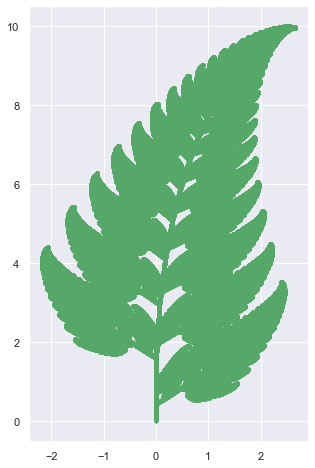

In [4]:
plt.figure(figsize = [5,8])
plt.scatter(X,Y,color = 'g',marker = '.')
plt.show()

#### Method-2 : Manual Matrix Multiplication


In this method we first define matrices. Then we will manually multiply these matrices to get desired plot of fern. This correspond to the following transformations:

$ f_{1}(x,y)={\begin{bmatrix}\ 0.00 &amp; \ 0.00\ \\
                       0.00&amp;\ 0.16\end{bmatrix}}{\begin{bmatrix}\ x \\ y\end{bmatrix}} $

$  f_{2}(x,y)={\begin{bmatrix}\ 0.85&amp;\ 0.04\ \\ -0.04&amp;\ 0.85\end{bmatrix}}{\begin{bmatrix}\ x \\ y\end{bmatrix}}+{\begin{bmatrix}\ 0.00 \\ 1.60\end{bmatrix}} $

$  f_{3}(x,y)={\begin{bmatrix}\ 0.20&amp;\ -0.26\ \\ 0.23&amp;\ 0.22\end{bmatrix}}{\begin{bmatrix}\ x \\ y\end{bmatrix}}+{\begin{bmatrix}\ 0.00 \\ 1.60\end{bmatrix}} $

$ f_{4}(x,y)={\begin{bmatrix}\ -0.15&amp;\ 0.28\ \\ 0.26&amp;\ 0.24\end{bmatrix}}{\begin{bmatrix}\ x \\ y\end{bmatrix}}+{\begin{bmatrix}\ 0.00 \\ 0.44\end{bmatrix}} $

In [5]:
import numpy as np

* To define number of iteration.

In [6]:
ITR = 100000

* To define matrices using numpy

In [7]:
x = np.array([[0.0,0.0] for k in range(ITR)])
A = np.array([[0.0,0.0],[0.0,0.16]])
B = np.array([[0.85,0.04],[-0.04,0.85]])
C = np.array([[0.20,-0.26],[0.23,0.22]])
D = np.array([[-0.15,0.28],[0.26,0.24]])
AD = np.array([[0.0,0.0],
             [0.0,1.6],
             [0.0,1.6],
             [0.0,0.44]])

* To implement transformation

In [8]:
X =[]
Y = []
x[0,0] = 0.0
x[0,1] = 0.0
t = 0
while t < ITR:
    ct = random.uniform(0,100)
    '''First condition'''
    if ct < 1.0:       
        for p in range(2):
            x[t,p] = 0.0
            for q in range(2):
                x[t,p] = x[t,p] + A[p,q]*x[t-1,q] 
        '''second condition'''            
    elif ct > 1.0 and ct < 86.0:
        for p  in range(2):
            x[t,p] = 0.0
            for q in range(2):
                x[t,p] = x[t,p] + B[p,q]*x[t-1,q]    
        for  p in range(2):
            x[t,p] = x[t,p]  + AD[1,p]
        '''third condition'''                 
    elif ct > 86.0 and ct < 93.0:
        for p  in range(2):
            x[t,p] = 0.0
            for q  in range(2):
                x[t,p] = x[t,p] + C[p,q]*x[t-1,q]      
        for p in range(2):
            x[t,p] = x[t,p]  + AD[2,p]
        '''fourth condition '''                 
    elif  ct > 93.0 and ct < 100.0:
        for p in range(2):
            x[1,p] = 0.0
            for q  in range(2):
                x[t,p] = x[t,p] + D[p,q]*x[t-1,q]       
        for p in range(2):
            x[t,p] = x[t,p]  + AD[3,p]

    X.append(x[t,0])
    Y.append(x[t,1])
    t = t +1

* To get the plot

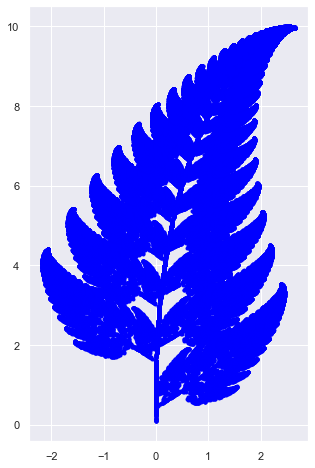

In [9]:
plt.figure(figsize = [5,8])
plt.scatter(X,Y,color = 'blue',marker = '.')
plt.show()